<a href="https://colab.research.google.com/github/sayakpaul/SimCLR-in-TensorFlow-2/blob/master/Supervised_Full_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial setup

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [2]:
# Other imports
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
#from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
from imutils import paths
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import cv2

# Random seed fixation
tf.random.set_seed(666)
np.random.seed(666)

In [3]:
# Train and test image paths
train_images = list(paths.list_images("/home/Experiment_data/DATASET/full_train/"))
test_images = list(paths.list_images("/home/Experiment_data/DATASET/test"))
print(len(train_images), len(test_images))

2070 230


In [23]:
def prepare_images(image_paths):
    images = []
    labels = []

    for image in tqdm(image_paths):
        image_pixels = plt.imread(image)
        print(image_pixels.shape)
        image_pixels = cv2.resize(image_pixels, (224, 224))
        image_pixels = image_pixels/255.

        label = image.split("/")[2].split("_")[0]

        images.append(image_pixels)
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    print(images.shape, labels.shape)

    return images, labels

In [ ]:
X_train, y_train = prepare_images(train_images)
X_test, y_test = prepare_images(test_images)

  0%|          | 8/2070 [00:00<01:27, 23.63it/s]

(500, 724, 3)
(500, 718, 3)
(500, 667, 3)
(500, 551, 3)
(583, 500, 3)
(500, 667, 3)
(671, 500, 3)
(500, 594, 3)
(500, 667, 3)
(500, 666, 3)
(655, 500, 3)
(500, 682, 3)
(500, 667, 3)
(500, 588, 3)


  2%|▏         | 42/2070 [00:00<00:20, 97.91it/s]

(522, 500, 3)
(674, 500, 3)
(500, 721, 3)
(500, 667, 3)
(500, 509, 3)
(816, 500, 3)
(500, 667, 3)
(802, 500, 3)
(500, 749, 3)
(583, 500, 3)
(667, 500, 3)
(500, 502, 3)
(500, 667, 3)
(602, 500, 3)
(654, 500, 3)
(501, 667, 3)
(500, 667, 3)
(500, 514, 3)
(609, 500, 3)
(500, 641, 3)
(500, 725, 3)
(501, 503, 3)
(500, 671, 3)
(500, 588, 3)
(656, 500, 3)
(500, 671, 3)
(542, 500, 3)
(500, 667, 3)
(500, 692, 3)


  3%|▎         | 71/2070 [00:00<00:16, 117.74it/s]

(500, 667, 3)
(500, 687, 3)
(610, 500, 3)
(501, 515, 3)
(500, 667, 3)
(658, 500, 3)
(500, 734, 3)
(500, 532, 3)
(500, 667, 3)
(500, 667, 3)
(666, 501, 3)
(500, 704, 3)
(667, 500, 3)
(715, 500, 3)
(501, 724, 3)
(500, 700, 3)
(500, 667, 3)
(500, 557, 3)
(500, 667, 3)
(863, 500, 3)
(500, 667, 3)
(520, 500, 3)
(500, 667, 3)
(500, 603, 3)
(667, 501, 3)
(500, 681, 3)
(500, 579, 3)
(665, 500, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)


  5%|▍         | 101/2070 [00:01<00:15, 124.57it/s]

(500, 667, 3)
(688, 500, 3)
(500, 676, 3)
(645, 500, 3)
(667, 500, 3)
(500, 668, 3)
(500, 667, 3)
(609, 500, 3)
(500, 708, 3)
(500, 601, 3)
(500, 621, 3)
(500, 667, 3)
(500, 660, 3)
(500, 679, 3)
(500, 667, 3)
(500, 667, 3)
(752, 500, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


  6%|▌         | 117/2070 [00:01<00:14, 132.87it/s]

(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 558, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 810, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


  7%|▋         | 146/2070 [00:01<00:14, 134.70it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 536, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 604, 3)
(500, 604, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


  9%|▊         | 176/2070 [00:01<00:13, 139.76it/s]

(500, 752, 3)
(500, 752, 3)
(500, 615, 3)
(752, 500, 3)
(500, 579, 3)
(500, 692, 3)
(500, 752, 3)
(500, 675, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 738, 3)
(500, 699, 3)
(500, 752, 3)
(500, 667, 3)
(752, 500, 3)
(500, 769, 3)
(500, 667, 3)
(500, 585, 3)
(500, 819, 3)
(644, 500, 3)


 10%|█         | 208/2070 [00:01<00:12, 145.18it/s]

(721, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 667, 3)
(661, 500, 3)
(500, 534, 3)
(752, 500, 3)
(500, 752, 3)
(772, 500, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(752, 500, 3)
(500, 556, 3)
(500, 694, 3)
(500, 667, 3)
(500, 752, 3)
(500, 752, 3)
(500, 666, 3)
(500, 667, 3)
(500, 691, 3)
(500, 635, 3)
(500, 767, 3)
(500, 663, 3)
(500, 752, 3)
(510, 500, 3)
(500, 752, 3)
(500, 775, 3)
(634, 500, 3)
(752, 500, 3)


 12%|█▏        | 241/2070 [00:02<00:12, 150.84it/s]

(500, 752, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 666, 3)
(500, 820, 3)
(752, 500, 3)
(752, 500, 3)
(500, 641, 3)
(500, 750, 3)
(500, 506, 3)
(500, 752, 3)
(752, 500, 3)
(500, 536, 3)
(500, 556, 3)
(500, 773, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 529, 3)
(500, 554, 3)
(584, 500, 3)
(500, 613, 3)
(610, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 581, 3)
(500, 771, 3)


 13%|█▎        | 273/2070 [00:02<00:12, 144.94it/s]

(669, 500, 3)
(752, 500, 3)
(500, 667, 3)
(500, 598, 3)
(500, 526, 3)
(518, 500, 3)
(500, 752, 3)
(501, 833, 3)
(500, 744, 3)
(500, 606, 3)
(500, 656, 3)
(549, 500, 3)
(696, 500, 3)
(500, 644, 3)
(500, 752, 3)
(500, 667, 3)
(500, 715, 3)
(500, 732, 3)
(500, 697, 3)
(552, 500, 3)
(500, 727, 3)
(629, 500, 3)
(500, 742, 3)
(500, 680, 3)
(500, 724, 3)
(500, 596, 3)


 15%|█▍        | 303/2070 [00:02<00:12, 137.14it/s]

(500, 752, 3)
(500, 576, 3)
(500, 768, 3)
(752, 500, 3)
(610, 500, 3)
(500, 754, 3)
(500, 723, 3)
(671, 500, 3)
(637, 500, 3)
(500, 749, 3)
(500, 752, 3)
(500, 752, 3)
(500, 730, 3)
(752, 500, 3)
(500, 750, 3)
(500, 701, 3)
(500, 755, 3)
(500, 632, 3)
(500, 752, 3)
(500, 752, 3)
(500, 676, 3)
(500, 683, 3)
(500, 752, 3)
(500, 752, 3)
(500, 702, 3)
(500, 757, 3)
(500, 799, 3)


 16%|█▌        | 334/2070 [00:02<00:11, 145.42it/s]

(500, 758, 3)
(500, 732, 3)
(500, 752, 3)
(752, 500, 3)
(537, 500, 3)
(500, 678, 3)
(500, 706, 3)
(662, 500, 3)
(500, 648, 3)
(500, 752, 3)
(500, 771, 3)
(752, 500, 3)
(500, 752, 3)
(500, 694, 3)
(500, 583, 3)
(500, 746, 3)
(571, 500, 3)
(500, 752, 3)
(500, 637, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 754, 3)
(500, 775, 3)
(704, 500, 3)
(752, 500, 3)
(500, 710, 3)
(500, 734, 3)
(500, 755, 3)
(500, 752, 3)
(500, 752, 3)


 18%|█▊        | 365/2070 [00:02<00:11, 147.14it/s]

(752, 500, 3)
(500, 695, 3)
(500, 723, 3)
(500, 797, 3)
(500, 773, 3)
(500, 778, 3)
(500, 692, 3)
(500, 752, 3)
(594, 500, 3)
(500, 752, 3)
(642, 500, 3)
(500, 701, 3)
(500, 752, 3)
(500, 722, 3)
(500, 752, 3)
(500, 613, 3)
(500, 671, 3)
(500, 653, 3)
(752, 500, 3)
(641, 500, 3)
(500, 698, 3)
(500, 641, 3)
(500, 680, 3)
(500, 752, 3)
(590, 500, 3)
(666, 500, 3)
(672, 500, 3)
(623, 500, 3)
(574, 500, 3)
(660, 500, 3)
(500, 534, 3)


 19%|█▉        | 398/2070 [00:03<00:10, 153.73it/s]

(590, 500, 3)
(500, 672, 3)
(500, 577, 3)
(500, 741, 3)
(500, 752, 3)
(570, 500, 3)
(500, 568, 3)
(501, 636, 3)
(500, 752, 3)
(652, 500, 3)
(566, 500, 3)
(500, 506, 3)
(500, 702, 3)
(674, 500, 3)
(680, 500, 3)
(500, 625, 3)
(500, 752, 3)
(500, 506, 3)
(500, 781, 3)
(500, 517, 3)
(523, 500, 3)
(500, 752, 3)
(501, 779, 3)
(500, 565, 3)
(500, 548, 3)
(500, 717, 3)
(500, 639, 3)
(559, 501, 3)
(692, 500, 3)
(500, 666, 3)
(500, 752, 3)


 20%|██        | 414/2070 [00:03<00:11, 141.13it/s]

(500, 756, 3)
(530, 500, 3)
(500, 682, 3)
(589, 500, 3)
(598, 500, 3)
(500, 542, 3)
(672, 500, 3)
(501, 530, 3)
(602, 501, 3)
(724, 501, 3)
(500, 602, 3)
(500, 717, 3)
(500, 562, 3)
(500, 718, 3)
(507, 500, 3)
(667, 500, 3)
(501, 568, 3)
(500, 752, 3)
(500, 752, 3)
(500, 931, 3)
(500, 741, 3)
(500, 768, 3)
(500, 562, 3)
(501, 534, 3)
(600, 500, 3)
(563, 500, 3)
(513, 500, 3)


 22%|██▏       | 448/2070 [00:03<00:10, 150.36it/s]

(534, 500, 3)
(500, 752, 3)
(575, 500, 3)
(547, 500, 3)
(533, 500, 3)
(578, 500, 3)
(531, 500, 3)
(501, 783, 3)
(500, 667, 3)
(603, 500, 3)
(501, 731, 3)
(550, 500, 3)
(669, 500, 3)
(563, 500, 3)
(500, 709, 3)
(500, 693, 3)
(500, 673, 3)
(502, 500, 3)
(549, 500, 3)
(500, 825, 3)
(585, 500, 3)
(500, 595, 3)
(500, 620, 3)
(500, 667, 3)
(500, 675, 3)
(500, 667, 3)
(500, 667, 3)
(501, 529, 3)
(500, 828, 3)
(500, 667, 3)
(500, 667, 3)
(500, 665, 3)
(500, 667, 3)


 23%|██▎       | 483/2070 [00:03<00:09, 159.66it/s]

(500, 667, 3)
(500, 551, 3)
(500, 750, 3)
(500, 667, 3)
(750, 500, 3)
(500, 616, 3)
(500, 616, 3)
(501, 667, 3)
(500, 667, 3)
(500, 667, 3)
(565, 500, 3)
(500, 590, 3)
(500, 667, 3)
(500, 751, 3)
(616, 500, 3)
(500, 665, 3)
(500, 667, 3)
(500, 667, 3)
(500, 526, 3)
(500, 660, 3)
(601, 500, 3)
(500, 667, 3)
(500, 740, 3)
(500, 667, 3)
(500, 644, 3)
(667, 500, 3)
(500, 750, 3)
(500, 526, 3)
(500, 752, 3)
(500, 517, 3)
(500, 667, 3)
(500, 695, 3)
(500, 667, 3)
(500, 750, 3)


 25%|██▍       | 517/2070 [00:03<00:09, 161.19it/s]

(500, 820, 3)
(500, 680, 3)
(500, 827, 3)
(500, 667, 3)
(606, 500, 3)
(500, 593, 3)
(500, 667, 3)
(500, 668, 3)
(667, 500, 3)
(667, 500, 3)
(500, 669, 3)
(500, 698, 3)
(500, 667, 3)
(669, 500, 3)
(667, 500, 3)
(501, 667, 3)
(500, 667, 3)
(500, 667, 3)
(550, 500, 3)
(654, 501, 3)
(500, 666, 3)
(500, 631, 3)
(500, 667, 3)
(500, 667, 3)
(500, 651, 3)
(500, 750, 3)
(667, 500, 3)
(500, 666, 3)
(606, 500, 3)
(533, 501, 3)
(500, 826, 3)
(500, 579, 3)
(667, 500, 3)
(752, 500, 3)
(500, 667, 3)


 27%|██▋       | 551/2070 [00:04<00:09, 154.00it/s]

(500, 752, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 650, 3)
(551, 500, 3)
(500, 750, 3)
(544, 500, 3)
(659, 500, 3)
(500, 667, 3)
(667, 500, 3)
(751, 500, 3)
(604, 500, 3)
(501, 658, 3)
(667, 500, 3)
(667, 500, 3)
(605, 500, 3)
(1066, 500, 3)
(739, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 747, 3)
(501, 514, 3)
(500, 667, 3)
(710, 500, 3)
(590, 500, 3)
(667, 500, 3)
(501, 667, 3)
(500, 669, 3)


 28%|██▊       | 584/2070 [00:04<00:09, 155.30it/s]

(750, 500, 3)
(753, 501, 3)
(500, 667, 3)
(594, 500, 3)
(501, 508, 3)
(500, 700, 3)
(667, 500, 3)
(500, 667, 3)
(667, 500, 3)
(500, 755, 3)
(500, 536, 3)
(567, 500, 3)
(501, 753, 3)
(588, 500, 3)
(667, 500, 3)
(500, 546, 3)
(500, 751, 3)
(500, 667, 3)
(671, 500, 3)
(804, 500, 3)
(750, 500, 3)
(500, 750, 3)
(500, 751, 3)
(500, 667, 3)
(500, 667, 3)
(526, 500, 3)
(667, 500, 3)
(666, 500, 3)
(500, 667, 3)
(667, 501, 3)
(500, 506, 3)
(667, 500, 3)


 30%|██▉       | 618/2070 [00:04<00:09, 158.33it/s]

(500, 667, 3)
(500, 751, 3)
(753, 501, 3)
(500, 660, 3)
(753, 501, 3)
(650, 500, 3)
(637, 500, 3)
(667, 500, 3)
(615, 500, 3)
(500, 667, 3)
(635, 500, 3)
(686, 500, 3)
(500, 667, 3)
(750, 500, 3)
(745, 500, 3)
(638, 500, 3)
(1168, 500, 3)
(517, 500, 3)
(756, 500, 3)
(905, 500, 3)
(667, 500, 3)
(554, 501, 3)
(750, 500, 3)
(666, 500, 3)
(579, 500, 3)
(667, 500, 3)
(742, 500, 3)
(645, 500, 3)
(501, 667, 3)
(667, 500, 3)
(667, 500, 3)
(667, 500, 3)


 31%|███▏      | 651/2070 [00:04<00:08, 159.86it/s]

(500, 667, 3)
(607, 500, 3)
(501, 667, 3)
(500, 665, 3)
(667, 501, 3)
(667, 501, 3)
(500, 667, 3)
(500, 750, 3)
(500, 667, 3)
(500, 610, 3)
(500, 670, 3)
(500, 667, 3)
(500, 661, 3)
(500, 649, 3)
(500, 574, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(661, 500, 3)
(502, 500, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)
(500, 667, 3)
(923, 500, 3)
(500, 649, 3)
(500, 667, 3)
(500, 667, 3)
(500, 572, 3)
(500, 667, 3)
(700, 500, 3)
(501, 513, 3)
(631, 500, 3)
(509, 500, 3)


 33%|███▎      | 686/2070 [00:04<00:08, 166.26it/s]

(587, 500, 3)
(500, 541, 3)
(500, 539, 3)
(500, 667, 3)
(500, 618, 3)
(500, 667, 3)
(568, 500, 3)
(500, 612, 3)
(500, 667, 3)
(500, 563, 3)
(500, 667, 3)
(500, 667, 3)
(500, 520, 3)
(500, 639, 3)
(500, 673, 3)
(500, 573, 3)
(500, 504, 3)
(500, 667, 3)
(500, 667, 3)
(667, 501, 3)
(500, 667, 3)
(501, 632, 3)
(500, 667, 3)
(500, 669, 3)
(655, 500, 3)
(500, 585, 3)
(500, 667, 3)
(500, 550, 3)
(500, 550, 3)
(582, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 752, 3)
(500, 648, 3)


 34%|███▍      | 703/2070 [00:05<00:08, 163.81it/s]

(500, 667, 3)
(500, 667, 3)
(500, 593, 3)
(500, 638, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(616, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 562, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 687, 3)
(500, 607, 3)
(500, 747, 3)
(500, 687, 3)
(500, 697, 3)


 36%|███▌      | 735/2070 [00:05<00:09, 140.19it/s]

(500, 667, 3)
(500, 737, 3)
(500, 548, 3)
(500, 603, 3)
(500, 744, 3)
(500, 750, 3)
(500, 667, 3)
(573, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 592, 3)
(750, 500, 3)
(501, 667, 3)
(500, 548, 3)
(500, 667, 3)
(500, 551, 3)
(500, 666, 3)
(500, 750, 3)
(500, 667, 3)
(500, 645, 3)
(500, 667, 3)
(500, 806, 3)
(561, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 747, 3)
(500, 577, 3)
(500, 667, 3)
(550, 500, 3)


 37%|███▋      | 766/2070 [00:05<00:09, 137.59it/s]

(598, 500, 3)
(500, 639, 3)
(501, 628, 3)
(500, 757, 3)
(500, 667, 3)
(501, 657, 3)
(500, 666, 3)
(500, 666, 3)
(500, 667, 3)
(500, 669, 3)
(500, 667, 3)
(500, 750, 3)
(500, 542, 3)
(667, 500, 3)
(500, 667, 3)
(500, 824, 3)
(500, 666, 3)
(500, 770, 3)
(500, 714, 3)
(500, 666, 3)
(500, 666, 3)
(500, 618, 3)
(500, 598, 3)
(548, 500, 3)
(500, 750, 3)
(500, 667, 3)


 38%|███▊      | 795/2070 [00:05<00:09, 138.34it/s]

(500, 666, 3)
(500, 667, 3)
(500, 714, 3)
(522, 500, 3)
(755, 500, 3)
(500, 611, 3)
(500, 750, 3)
(500, 668, 3)
(500, 813, 3)
(500, 750, 3)
(529, 501, 3)
(500, 660, 3)
(500, 667, 3)
(500, 750, 3)
(500, 750, 3)
(500, 720, 3)
(667, 500, 3)
(500, 667, 3)
(500, 750, 3)
(546, 500, 3)
(500, 667, 3)
(500, 529, 3)
(628, 500, 3)
(500, 750, 3)
(500, 589, 3)
(501, 667, 3)
(500, 535, 3)
(503, 500, 3)
(504, 500, 3)
(500, 667, 3)


 40%|███▉      | 826/2070 [00:05<00:08, 141.21it/s]

(500, 667, 3)
(501, 667, 3)
(500, 750, 3)
(500, 520, 3)
(501, 675, 3)
(667, 500, 3)
(500, 751, 3)
(500, 504, 3)
(500, 502, 3)
(500, 666, 3)
(500, 667, 3)
(500, 750, 3)
(500, 556, 3)
(500, 531, 3)
(667, 501, 3)
(667, 500, 3)
(500, 667, 3)
(654, 500, 3)
(501, 674, 3)
(590, 500, 3)
(500, 648, 3)
(750, 500, 3)
(500, 503, 3)
(545, 500, 3)
(666, 500, 3)
(500, 752, 3)
(500, 667, 3)
(661, 500, 3)
(500, 667, 3)


 41%|████▏     | 859/2070 [00:06<00:08, 149.76it/s]

(500, 667, 3)
(500, 667, 3)
(500, 754, 3)
(500, 669, 3)
(500, 667, 3)
(500, 832, 3)
(667, 500, 3)
(500, 667, 3)
(500, 667, 3)
(578, 500, 3)
(500, 667, 3)
(500, 559, 3)
(735, 500, 3)
(750, 500, 3)
(501, 728, 3)
(500, 647, 3)
(500, 752, 3)
(500, 500, 3)
(500, 750, 3)
(500, 667, 3)
(500, 693, 3)
(500, 667, 3)
(500, 667, 3)
(500, 666, 3)
(501, 707, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(667, 500, 3)
(500, 752, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)


 43%|████▎     | 892/2070 [00:06<00:07, 156.48it/s]

(500, 667, 3)
(500, 599, 3)
(540, 500, 3)
(501, 753, 3)
(500, 750, 3)
(500, 666, 3)
(500, 559, 3)
(500, 669, 3)
(500, 750, 3)
(500, 666, 3)
(500, 669, 3)
(500, 667, 3)
(600, 501, 3)
(500, 703, 3)
(549, 500, 3)
(500, 666, 3)
(666, 500, 3)
(500, 667, 3)
(500, 666, 3)
(518, 500, 3)
(500, 752, 3)
(500, 667, 3)
(500, 684, 3)
(500, 756, 3)
(500, 667, 3)
(500, 509, 3)
(500, 750, 3)
(667, 500, 3)
(750, 500, 3)
(627, 500, 3)
(500, 539, 3)
(500, 667, 3)
(500, 667, 3)


 45%|████▍     | 923/2070 [00:06<00:08, 141.28it/s]

(501, 667, 3)
(613, 500, 3)
(500, 667, 3)
(500, 750, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 534, 3)
(500, 666, 3)
(576, 500, 3)
(500, 752, 3)
(500, 667, 3)
(500, 667, 3)
(500, 752, 3)
(500, 593, 3)
(500, 752, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 667, 3)
(500, 667, 3)
(500, 635, 3)
(500, 568, 3)
(500, 667, 3)
(500, 752, 3)


 45%|████▌     | 938/2070 [00:06<00:07, 143.35it/s]

(556, 500, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 684, 3)
(500, 667, 3)
(501, 753, 3)
(500, 752, 3)
(674, 500, 3)
(500, 750, 3)
(500, 667, 3)
(500, 667, 3)
(750, 500, 3)
(500, 752, 3)
(500, 667, 3)
(500, 707, 3)
(500, 752, 3)
(615, 500, 3)
(500, 717, 3)
(500, 594, 3)
(500, 752, 3)
(500, 750, 3)
(500, 752, 3)
(500, 752, 3)


 47%|████▋     | 970/2070 [00:06<00:07, 143.91it/s]

(500, 667, 3)
(500, 740, 3)
(500, 667, 3)
(500, 750, 3)
(500, 667, 3)
(500, 748, 3)
(500, 667, 3)
(500, 752, 3)
(505, 501, 3)
(500, 752, 3)
(500, 667, 3)
(596, 500, 3)
(511, 500, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 729, 3)
(500, 667, 3)
(500, 752, 3)
(500, 750, 3)
(653, 500, 3)
(500, 752, 3)
(500, 503, 3)
(500, 752, 3)
(500, 576, 3)
(500, 750, 3)
(510, 500, 3)
(500, 750, 3)
(500, 752, 3)
(750, 500, 3)


 49%|████▊     | 1004/2070 [00:07<00:06, 154.48it/s]

(501, 753, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 569, 3)
(750, 500, 3)
(500, 724, 3)
(667, 500, 3)
(500, 667, 3)
(500, 646, 3)
(500, 667, 3)
(521, 500, 3)
(500, 667, 3)
(500, 659, 3)
(500, 512, 3)
(500, 682, 3)
(508, 500, 3)
(500, 731, 3)
(500, 661, 3)
(500, 667, 3)
(667, 500, 3)
(528, 500, 3)
(500, 666, 3)
(500, 750, 3)
(500, 703, 3)
(576, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 676, 3)


 50%|█████     | 1036/2070 [00:07<00:06, 148.76it/s]

(500, 667, 3)
(500, 666, 3)
(500, 694, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(569, 500, 3)
(500, 563, 3)
(500, 667, 3)
(518, 500, 3)
(500, 748, 3)
(500, 657, 3)
(500, 625, 3)
(500, 535, 3)
(500, 667, 3)
(500, 687, 3)
(500, 667, 3)
(555, 500, 3)
(609, 500, 3)
(500, 765, 3)
(500, 667, 3)
(500, 666, 3)
(500, 667, 3)
(500, 614, 3)
(668, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 661, 3)


 52%|█████▏    | 1068/2070 [00:07<00:06, 148.35it/s]

(500, 653, 3)
(500, 666, 3)
(544, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(542, 500, 3)
(500, 667, 3)
(500, 500, 3)
(500, 750, 3)
(500, 667, 3)
(500, 530, 3)
(500, 669, 3)
(500, 666, 3)
(500, 748, 3)
(500, 520, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(545, 500, 3)
(500, 629, 3)
(500, 670, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 666, 3)
(571, 500, 3)
(500, 751, 3)
(500, 667, 3)
(500, 667, 3)


 53%|█████▎    | 1098/2070 [00:07<00:07, 137.06it/s]

(500, 679, 3)
(500, 752, 3)
(500, 663, 3)
(500, 667, 3)
(500, 817, 3)
(500, 752, 3)
(500, 667, 3)
(500, 752, 3)
(500, 892, 3)
(500, 752, 3)
(590, 500, 3)
(667, 500, 3)
(500, 690, 3)
(500, 683, 3)
(500, 667, 3)
(505, 500, 3)
(500, 667, 3)
(634, 500, 3)
(500, 695, 3)
(500, 747, 3)
(500, 709, 3)
(501, 737, 3)
(500, 775, 3)
(501, 753, 3)
(500, 624, 3)


 55%|█████▍    | 1129/2070 [00:08<00:06, 144.33it/s]

(500, 752, 3)
(540, 500, 3)
(500, 752, 3)
(500, 715, 3)
(501, 574, 3)
(686, 500, 3)
(500, 667, 3)
(500, 647, 3)
(500, 537, 3)
(500, 667, 3)
(524, 500, 3)
(500, 752, 3)
(500, 747, 3)
(500, 643, 3)
(667, 500, 3)
(501, 753, 3)
(500, 563, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 637, 3)
(667, 500, 3)
(500, 650, 3)
(500, 752, 3)
(500, 783, 3)
(500, 752, 3)
(501, 753, 3)
(500, 747, 3)
(501, 762, 3)
(500, 667, 3)
(500, 667, 3)


 56%|█████▌    | 1161/2070 [00:08<00:06, 150.40it/s]

(500, 544, 3)
(500, 667, 3)
(500, 631, 3)
(500, 667, 3)
(500, 752, 3)
(667, 500, 3)
(500, 738, 3)
(500, 695, 3)
(667, 500, 3)
(500, 667, 3)
(501, 717, 3)
(500, 667, 3)
(500, 777, 3)
(500, 667, 3)
(500, 752, 3)
(626, 500, 3)
(500, 667, 3)
(589, 500, 3)
(667, 500, 3)
(500, 752, 3)
(500, 752, 3)
(550, 500, 3)
(500, 678, 3)
(667, 500, 3)
(504, 501, 3)
(500, 667, 3)
(500, 667, 3)
(529, 500, 3)
(500, 749, 3)
(500, 747, 3)
(500, 804, 3)
(500, 667, 3)


 57%|█████▋    | 1178/2070 [00:08<00:05, 153.71it/s]

(500, 667, 3)
(500, 858, 3)
(500, 667, 3)
(500, 690, 3)
(500, 747, 3)
(501, 748, 3)
(667, 500, 3)
(500, 700, 3)
(500, 667, 3)
(500, 622, 3)
(500, 610, 3)
(500, 623, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(689, 500, 3)
(500, 571, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 720, 3)
(500, 568, 3)
(500, 630, 3)
(500, 625, 3)
(501, 667, 3)
(500, 797, 3)
(501, 540, 3)


 58%|█████▊    | 1209/2070 [00:08<00:06, 139.47it/s]

(500, 667, 3)
(500, 754, 3)
(500, 666, 3)
(500, 667, 3)
(500, 567, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)
(500, 667, 3)
(642, 501, 3)
(500, 667, 3)
(500, 546, 3)
(527, 500, 3)
(501, 667, 3)
(500, 750, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 754, 3)
(500, 742, 3)
(500, 667, 3)
(563, 500, 3)
(500, 535, 3)
(500, 667, 3)
(573, 501, 3)
(501, 667, 3)
(501, 667, 3)
(500, 674, 3)


 60%|█████▉    | 1241/2070 [00:08<00:05, 149.47it/s]

(501, 753, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 594, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(501, 709, 3)
(561, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 537, 3)
(500, 647, 3)
(500, 556, 3)
(500, 750, 3)
(501, 667, 3)
(501, 646, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(508, 500, 3)
(500, 650, 3)
(500, 667, 3)
(501, 667, 3)
(500, 750, 3)
(500, 731, 3)
(501, 667, 3)
(500, 667, 3)
(518, 500, 3)
(500, 536, 3)


 62%|██████▏   | 1274/2070 [00:08<00:05, 149.70it/s]

(500, 667, 3)
(500, 657, 3)
(701, 500, 3)
(500, 524, 3)
(500, 667, 3)
(500, 667, 3)
(752, 500, 3)
(752, 500, 3)
(616, 500, 3)
(500, 752, 3)
(631, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 707, 3)
(752, 500, 3)
(500, 752, 3)
(500, 681, 3)
(500, 774, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(500, 752, 3)
(500, 641, 3)
(500, 752, 3)


 63%|██████▎   | 1305/2070 [00:09<00:05, 142.07it/s]

(500, 722, 3)
(500, 752, 3)
(698, 500, 3)
(500, 752, 3)
(578, 500, 3)
(711, 500, 3)
(500, 752, 3)
(500, 755, 3)
(500, 666, 3)
(500, 752, 3)
(500, 752, 3)
(688, 500, 3)
(752, 500, 3)
(500, 663, 3)
(678, 500, 3)
(752, 500, 3)
(752, 500, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 755, 3)
(500, 752, 3)
(500, 534, 3)
(500, 752, 3)
(752, 500, 3)
(500, 650, 3)


 65%|██████▍   | 1336/2070 [00:09<00:05, 131.76it/s]

(500, 752, 3)
(585, 500, 3)
(500, 704, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(659, 500, 3)
(500, 752, 3)
(618, 500, 3)
(500, 539, 3)
(500, 752, 3)
(500, 752, 3)
(752, 500, 3)
(522, 500, 3)
(500, 752, 3)
(500, 717, 3)
(752, 500, 3)
(500, 752, 3)
(500, 752, 3)
(731, 500, 3)
(500, 800, 3)
(500, 752, 3)
(500, 752, 3)
(675, 500, 3)


 65%|██████▌   | 1351/2070 [00:09<00:05, 130.66it/s]

(500, 752, 3)
(500, 919, 3)
(500, 752, 3)
(500, 646, 3)
(752, 500, 3)
(752, 500, 3)
(651, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 707, 3)
(573, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 67%|██████▋   | 1381/2070 [00:09<00:05, 135.54it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 547, 3)
(500, 640, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 68%|██████▊   | 1408/2070 [00:10<00:09, 73.39it/s] 

(500, 752, 3)
(500, 559, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(515, 500, 3)
(500, 752, 3)
(500, 708, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 676, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 69%|██████▉   | 1436/2070 [00:10<00:07, 87.60it/s]

(500, 726, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 555, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 600, 3)
(500, 752, 3)
(500, 752, 3)
(500, 533, 3)


 70%|██████▉   | 1448/2070 [00:10<00:07, 83.29it/s]

(500, 752, 3)
(500, 700, 3)
(500, 752, 3)
(500, 752, 3)
(501, 793, 3)
(500, 794, 3)
(500, 621, 3)
(500, 750, 3)
(500, 667, 3)
(500, 667, 3)
(501, 672, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 752, 3)
(500, 667, 3)
(500, 667, 3)
(500, 752, 3)
(500, 572, 3)


 71%|███████▏  | 1478/2070 [00:11<00:05, 108.35it/s]

(500, 666, 3)
(500, 679, 3)
(500, 702, 3)
(573, 501, 3)
(500, 667, 3)
(752, 500, 3)
(500, 752, 3)
(509, 500, 3)
(500, 722, 3)
(500, 667, 3)
(500, 750, 3)
(500, 678, 3)
(500, 693, 3)
(535, 500, 3)
(500, 672, 3)
(500, 618, 3)
(500, 757, 3)
(500, 667, 3)
(500, 784, 3)
(500, 723, 3)
(500, 667, 3)
(500, 668, 3)
(500, 704, 3)
(500, 670, 3)
(500, 758, 3)
(500, 623, 3)
(500, 650, 3)
(500, 657, 3)
(500, 552, 3)
(500, 510, 3)
(500, 693, 3)


 73%|███████▎  | 1510/2070 [00:11<00:04, 127.68it/s]

(501, 563, 3)
(500, 625, 3)
(500, 692, 3)
(500, 667, 3)
(500, 747, 3)
(570, 500, 3)
(501, 748, 3)
(500, 750, 3)
(500, 611, 3)
(752, 500, 3)
(554, 500, 3)
(500, 752, 3)
(500, 823, 3)
(500, 781, 3)
(501, 748, 3)
(500, 667, 3)
(500, 642, 3)
(500, 752, 3)
(501, 753, 3)
(564, 500, 3)
(500, 690, 3)
(500, 752, 3)
(501, 753, 3)
(500, 752, 3)
(500, 752, 3)
(500, 667, 3)
(500, 747, 3)
(500, 726, 3)
(500, 667, 3)
(500, 620, 3)


 74%|███████▍  | 1541/2070 [00:11<00:04, 126.93it/s]

(500, 750, 3)
(500, 663, 3)
(500, 667, 3)
(500, 750, 3)
(500, 695, 3)
(500, 752, 3)
(643, 500, 3)
(500, 720, 3)
(501, 677, 3)
(500, 747, 3)
(500, 748, 3)
(500, 711, 3)
(500, 667, 3)
(500, 752, 3)
(500, 667, 3)
(500, 667, 3)
(517, 500, 3)
(764, 500, 3)
(667, 500, 3)
(552, 500, 3)
(667, 500, 3)
(943, 500, 3)
(680, 500, 3)
(500, 667, 3)
(689, 500, 3)
(500, 572, 3)


 76%|███████▌  | 1575/2070 [00:11<00:03, 144.28it/s]

(500, 653, 3)
(826, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 669, 3)
(667, 500, 3)
(500, 667, 3)
(666, 500, 3)
(500, 666, 3)
(500, 667, 3)
(667, 500, 3)
(500, 667, 3)
(500, 667, 3)
(511, 500, 3)
(519, 500, 3)
(500, 667, 3)
(500, 652, 3)
(588, 500, 3)
(667, 500, 3)
(500, 657, 3)
(500, 667, 3)
(667, 500, 3)
(718, 500, 3)
(621, 500, 3)
(500, 583, 3)
(623, 500, 3)
(500, 667, 3)
(500, 666, 3)
(750, 500, 3)
(674, 500, 3)
(500, 667, 3)
(725, 500, 3)
(500, 710, 3)


 77%|███████▋  | 1590/2070 [00:11<00:03, 139.00it/s]

(500, 667, 3)
(667, 500, 3)
(500, 516, 3)
(500, 667, 3)
(686, 500, 3)
(500, 667, 3)
(500, 667, 3)
(712, 500, 3)
(770, 500, 3)
(667, 500, 3)
(715, 500, 3)
(500, 718, 3)
(667, 500, 3)
(667, 500, 3)
(500, 772, 3)
(500, 666, 3)
(750, 500, 3)
(500, 670, 3)
(837, 500, 3)
(667, 500, 3)
(590, 500, 3)
(667, 500, 3)
(667, 500, 3)
(501, 506, 3)
(500, 561, 3)
(698, 500, 3)
(970, 500, 3)
(667, 500, 3)


 78%|███████▊  | 1621/2070 [00:12<00:03, 119.56it/s]

(500, 667, 3)
(747, 500, 3)
(540, 500, 3)
(667, 500, 3)
(500, 667, 3)
(742, 500, 3)
(500, 667, 3)
(719, 500, 3)
(667, 500, 3)
(667, 500, 3)
(500, 667, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(666, 500, 3)
(755, 500, 3)
(667, 500, 3)
(500, 604, 3)


 79%|███████▉  | 1634/2070 [00:12<00:03, 111.33it/s]

(500, 667, 3)
(500, 771, 3)
(500, 750, 3)
(500, 667, 3)
(541, 500, 3)
(500, 666, 3)
(500, 741, 3)
(666, 500, 3)
(500, 552, 3)
(500, 594, 3)
(562, 500, 3)
(500, 652, 3)
(500, 696, 3)
(500, 708, 3)
(500, 667, 3)
(501, 557, 3)
(500, 647, 3)
(500, 667, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 692, 3)


 80%|████████  | 1662/2070 [00:12<00:03, 118.67it/s]

(500, 705, 3)
(667, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(501, 759, 3)
(500, 667, 3)
(500, 511, 3)
(500, 590, 3)
(500, 667, 3)
(599, 500, 3)
(500, 613, 3)
(500, 667, 3)
(667, 500, 3)
(500, 667, 3)
(500, 556, 3)
(500, 667, 3)
(500, 667, 3)
(500, 755, 3)
(501, 533, 3)
(500, 667, 3)
(612, 500, 3)
(500, 511, 3)
(500, 667, 3)
(500, 573, 3)
(540, 500, 3)
(500, 667, 3)
(501, 667, 3)
(500, 766, 3)
(500, 667, 3)
(500, 755, 3)
(500, 699, 3)
(500, 667, 3)


 82%|████████▏ | 1695/2070 [00:12<00:02, 138.75it/s]

(500, 667, 3)
(511, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 664, 3)
(500, 667, 3)
(500, 605, 3)
(500, 557, 3)
(500, 667, 3)
(500, 750, 3)
(500, 667, 3)
(500, 680, 3)
(500, 676, 3)
(525, 500, 3)
(500, 606, 3)
(500, 752, 3)
(500, 667, 3)
(500, 682, 3)
(500, 668, 3)
(500, 668, 3)
(500, 667, 3)
(500, 660, 3)
(500, 755, 3)
(666, 500, 3)
(501, 586, 3)
(500, 667, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)


 83%|████████▎ | 1725/2070 [00:12<00:02, 132.18it/s]

(500, 667, 3)
(500, 527, 3)
(500, 667, 3)
(500, 668, 3)
(500, 668, 3)
(500, 669, 3)
(500, 753, 3)
(536, 500, 3)
(667, 500, 3)
(500, 547, 3)
(500, 750, 3)
(500, 668, 3)
(507, 500, 3)
(500, 667, 3)
(500, 750, 3)
(500, 694, 3)
(500, 667, 3)
(500, 668, 3)


 84%|████████▍ | 1739/2070 [00:13<00:02, 117.43it/s]

(500, 827, 3)
(500, 667, 3)
(500, 592, 3)
(617, 501, 3)
(500, 610, 3)
(500, 578, 3)
(500, 667, 3)
(500, 750, 3)
(500, 668, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 598, 3)
(500, 684, 3)
(500, 750, 3)
(500, 668, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 669, 3)
(501, 667, 3)
(500, 750, 3)


 85%|████████▍ | 1752/2070 [00:13<00:02, 108.68it/s]

(500, 667, 3)
(500, 667, 3)
(526, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 748, 3)
(500, 719, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(500, 528, 3)
(500, 671, 3)
(500, 649, 3)
(500, 667, 3)


 85%|████████▌ | 1764/2070 [00:13<00:03, 81.40it/s] 

(500, 724, 3)
(500, 627, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 641, 3)
(500, 712, 3)
(500, 707, 3)
(500, 500, 3)


 86%|████████▌ | 1774/2070 [00:13<00:04, 69.53it/s]

(500, 668, 3)
(500, 667, 3)
(500, 750, 3)
(500, 630, 3)
(500, 752, 3)
(518, 500, 3)
(536, 500, 3)


 86%|████████▌ | 1782/2070 [00:13<00:05, 55.55it/s]

(500, 667, 3)
(500, 711, 3)
(501, 705, 3)


 86%|████████▋ | 1789/2070 [00:14<00:06, 43.96it/s]

(500, 668, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 709, 3)
(500, 709, 3)
(500, 668, 3)
(500, 766, 3)
(500, 667, 3)
(500, 667, 3)


 87%|████████▋ | 1802/2070 [00:14<00:05, 45.18it/s]

(500, 677, 3)
(500, 668, 3)
(500, 667, 3)
(500, 668, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 752, 3)
(500, 752, 3)


 88%|████████▊ | 1813/2070 [00:14<00:04, 55.96it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 88%|████████▊ | 1820/2070 [00:14<00:06, 38.40it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 542, 3)


 88%|████████▊ | 1826/2070 [00:15<00:06, 37.85it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 728, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 89%|████████▊ | 1835/2070 [00:15<00:08, 28.30it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 90%|█████████ | 1863/2070 [00:15<00:03, 65.89it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)


 91%|█████████▏| 1893/2070 [00:16<00:01, 95.85it/s]

(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 717, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 752, 3)
(500, 596, 3)
(500, 752, 3)
(500, 636, 3)
(500, 752, 3)
(500, 566, 3)
(500, 728, 3)
(500, 666, 3)
(500, 667, 3)
(500, 666, 3)


 93%|█████████▎| 1926/2070 [00:16<00:01, 121.13it/s]

(500, 747, 3)
(500, 609, 3)
(667, 500, 3)
(500, 667, 3)
(500, 752, 3)
(591, 500, 3)
(500, 667, 3)
(500, 589, 3)
(500, 667, 3)
(500, 670, 3)
(501, 667, 3)
(500, 670, 3)
(500, 752, 3)
(500, 751, 3)
(500, 667, 3)
(667, 500, 3)
(500, 667, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(500, 668, 3)
(500, 666, 3)
(500, 666, 3)
(500, 667, 3)
(500, 567, 3)
(500, 752, 3)
(500, 754, 3)
(500, 637, 3)
(613, 500, 3)
(500, 666, 3)
(500, 615, 3)


 95%|█████████▍| 1957/2070 [00:16<00:00, 135.98it/s]

(500, 691, 3)
(500, 666, 3)
(500, 667, 3)
(500, 666, 3)
(500, 754, 3)
(500, 617, 3)
(500, 555, 3)
(500, 668, 3)
(500, 659, 3)
(500, 666, 3)
(500, 656, 3)
(500, 667, 3)
(667, 500, 3)
(500, 669, 3)
(500, 752, 3)
(500, 608, 3)
(500, 629, 3)
(501, 694, 3)
(500, 722, 3)
(500, 667, 3)
(500, 667, 3)
(501, 667, 3)
(500, 661, 3)
(501, 667, 3)
(500, 536, 3)
(500, 572, 3)
(500, 667, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)
(500, 747, 3)


 95%|█████████▌| 1972/2070 [00:16<00:00, 135.48it/s]

(590, 500, 3)
(568, 501, 3)
(500, 688, 3)
(667, 500, 3)
(500, 693, 3)
(500, 632, 3)
(500, 667, 3)
(500, 667, 3)
(751, 500, 3)
(501, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 529, 3)
(500, 701, 3)
(500, 754, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)


 97%|█████████▋| 2002/2070 [00:16<00:00, 130.95it/s]

(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 715, 3)
(500, 667, 3)
(500, 652, 3)
(500, 656, 3)
(529, 500, 3)
(500, 666, 3)
(500, 666, 3)
(500, 667, 3)
(500, 752, 3)
(500, 651, 3)
(500, 667, 3)
(500, 667, 3)
(500, 591, 3)
(500, 689, 3)
(500, 667, 3)
(500, 751, 3)


 97%|█████████▋| 2016/2070 [00:16<00:00, 109.73it/s]

(500, 667, 3)
(500, 565, 3)
(500, 667, 3)
(500, 750, 3)
(500, 752, 3)
(500, 625, 3)
(500, 659, 3)
(500, 667, 3)
(536, 500, 3)
(500, 667, 3)
(501, 667, 3)
(500, 667, 3)
(500, 742, 3)
(500, 666, 3)
(500, 668, 3)
(500, 747, 3)
(500, 666, 3)
(563, 500, 3)


 99%|█████████▊| 2044/2070 [00:17<00:00, 100.31it/s]

(677, 500, 3)
(500, 709, 3)
(500, 710, 3)
(500, 746, 3)
(500, 667, 3)
(500, 667, 3)
(500, 683, 3)
(635, 500, 3)
(500, 667, 3)
(500, 701, 3)
(500, 666, 3)
(500, 617, 3)
(500, 667, 3)
(500, 667, 3)
(518, 500, 3)
(500, 696, 3)
(500, 687, 3)
(500, 537, 3)
(500, 612, 3)
(500, 750, 3)
(500, 545, 3)
(500, 668, 3)
(500, 667, 3)
(500, 644, 3)


100%|██████████| 2070/2070 [00:17<00:00, 118.34it/s]

(501, 667, 3)
(500, 670, 3)
(500, 667, 3)
(510, 501, 3)
(501, 614, 3)
(500, 667, 3)
(500, 750, 3)
(500, 783, 3)
(501, 667, 3)
(500, 727, 3)
(500, 667, 3)
(533, 500, 3)
(500, 673, 3)
(500, 752, 3)
(667, 500, 3)
(500, 532, 3)
(500, 641, 3)
(500, 710, 3)
(510, 500, 3)
(501, 738, 3)
(500, 667, 3)
(500, 676, 3)
(500, 667, 3)
(500, 667, 3)


In [6]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [8]:
# Set up TensorFlow dataset for performance optimization

AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32

train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train_enc))
    .shuffle(1024)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test_enc))
    .shuffle(128)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

## Utilities

In [9]:
# Architecture utils
def get_resnet():
    base_model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(224, 224, 3))
    base_model.trainable = True
    
    inputs = Input((224, 224, 3))
    features = base_model(inputs, training=False)
    pooled_features = GlobalAveragePooling2D()(features)

    pooled_features = Dense(256)(pooled_features)
    pooled_features = Activation("relu")(pooled_features)
    outputs = Dense(23, activation="softmax")(pooled_features)

    resnet_simclr = Model(inputs, outputs)

    return resnet_simclr

In [10]:
def plot_training(H):
	with plt.xkcd():
		plt.plot(H.history["loss"], label="train_loss")
		plt.plot(H.history["val_loss"], label="val_loss")
		plt.plot(H.history["accuracy"], label="train_acc")
		plt.plot(H.history["val_accuracy"], label="val_acc")
		plt.title("Training Loss and Accuracy")
		plt.xlabel("Epoch #")
		plt.ylabel("Loss/Accuracy")
		plt.legend(loc="lower left")
		plt.show()

## Training

In [11]:
# Early Stopping to prevent overfitting
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, verbose=2, restore_best_weights=True)

In [12]:
get_resnet().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 23)                5911      
Total params: 24,118,167
Trainable params: 24,065,047
Non-trainable params: 53,120
____________________________________________

Epoch 1/50
65/65 [==============================] - 681s 10s/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
65/65 [==============================] - 661s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
65/65 [==============================] - 656s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


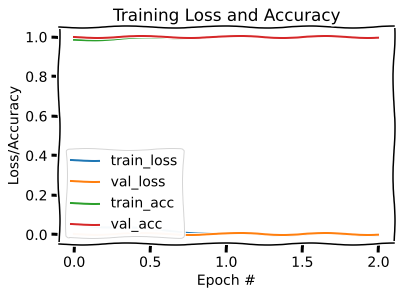

In [13]:
# Train the supervised model with full data

model = get_resnet()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(1e-3))
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=50,
                    callbacks=[es])
plot_training(history)

In [19]:
res_pred = model.predict(test_ds)

In [20]:
print(len(res_pred))

230
